# LINEAR REGRESSION

## Data Set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
df=pd.read_csv("test.csv")
x=df['x']
y=df['y']

In [32]:
print(x.values)
#1d arrray, if not ,reshape((-1,))

[ 77  21  22  20  36  15  62  95  20   5   4  19  96  62  36  15  65  14
  87  69  89  51  89  27  97  58  79  21  93  27  99  31  33  80  28  47
  53  69  28  33  91  71  50  76   4  37  70  68  40  35  94  88  52  31
  59   0  39  64  69  57  13  72  76  61  82  18  41  50  55  13  46  13
  79  53  15  28  81  69  52  84  68  27  56  48  40  39  82 100  59  43
  67  38  63  91  60  14  21  87  73]


In [33]:
y.values

array([ 79.77515201,  23.17727887,  25.60926156,  17.85738813,
        41.84986439,   9.80523488,  58.87465933,  97.61793701,
        18.39512747,   8.74674765,   2.81141583,  17.09537241,
        95.14907176,  61.38800663,  40.24701716,  14.82248589,
        66.95806869,  16.63507984,  90.65513736,  77.22982636,
        92.11906278,  46.91387709,  89.82634442,  21.71380347,
        97.41206981,  57.01631363,  78.31056542,  19.1315097 ,
        93.03483388,  26.59112396,  97.55155344,  31.43524822,
        35.12724777,  78.61042432,  33.07112825,  51.69967172,
        53.62235225,  69.46306072,  27.42497237,  36.34644189,
        95.06140858,  68.16724757,  50.96155532,  78.04237454,
         5.60766487,  36.11334779,  67.2352155 ,  65.01324035,
        38.14753871,  34.31141446,  95.28503937,  87.84749912,
        54.08170635,  31.93063515,  59.61247085,  -1.04011421,
        47.49374765,  62.60089773,  70.9146434 ,  56.14834113,
        14.05572877,  68.11367147,  75.59701346,  59.22

# visualisation

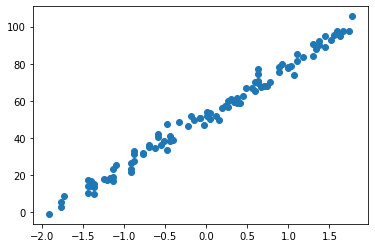

In [35]:
x=(x-x.mean())/x.std()
plt.scatter(x,y)
plt.show()

In [41]:
x.shape[0]

99

# Gradient Descent

In [42]:
#theta[0]=intercept; theta[1]=slope

def hypothesis(x,theta):
    return theta[1]*x + theta[0];

In [55]:
def error(x,y,theta):
    error=0
    for i in range(0,x.shape[0]):
        hx=hypothesis(x[i],theta)
        error+=(y[i]-hx)**2
    return error
    

In [53]:
#update theta

def gradient(x,y,theta):
    grad=np.zeros((2,))
    for i in range(0,x.shape[0]):
        hx=hypothesis(x[i],theta)
        grad[0]+=hx-y[i]
        grad[1]+=(hx-y[i])*x[i]
    return grad

In [77]:
def gradientDescent(x,y,learningRate=0.001):
    theta=np.array([-1.0,0.0])
    max_iteration=100
    itr=0
    theta_list=[]
    error_list=[]
    while(itr<max_iteration):
        
        grad=gradient(x,y,theta)
        err=error(x,y,theta)
        
        error_list.append(err)
        theta_list.append(theta)
        
        theta[0]-=learningRate*grad[0]
        theta[1]-=learningRate*grad[1]
        
        itr+=1
    return theta,error_list,theta_list

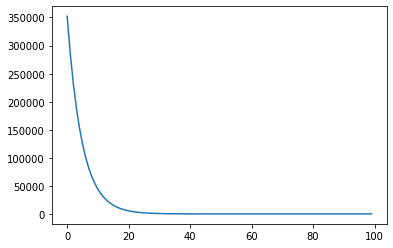

In [78]:
opt_theta,error_list,theta_list=gradientDescent(x,y)
plt.plot(error_list)
plt.show()

In [79]:
print(opt_theta)

[52.08604549 27.14778567]


In [92]:
xtest=np.linspace(-2,2,10)
print(xtest)

[-2.         -1.55555556 -1.11111111 -0.66666667 -0.22222222  0.22222222
  0.66666667  1.11111111  1.55555556  2.        ]


In [93]:
hypothesis(xtest,opt_theta)

array([ -2.20952585,   9.85615667,  21.92183919,  33.98752171,
        46.05320423,  58.11888675,  70.18456927,  82.25025179,
        94.31593431, 106.38161683])

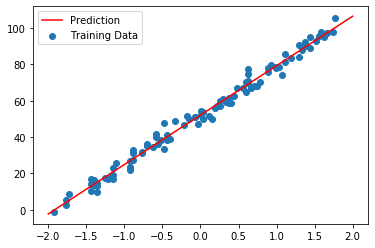

In [100]:
plt.scatter(x,y,label='Training Data')
plt.plot(xtest, hypothesis(xtest,opt_theta),color='red',label='Prediction')
plt.legend()
plt.show()